In [1]:
pip install shap

In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv('/content/labelled-balanced-data11.csv')

In [4]:
df['Class'].value_counts()

Class
0    3906
1    3900
Name: count, dtype: int64

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import shap
import matplotlib.pyplot as plt
import numpy as np





X = df.drop('Class', axis=1)
y = df['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Initialize the SHAP explainer
explainer = shap.TreeExplainer(rf_classifier)

# Compute SHAP values
shap_values = explainer.shap_values(X_train)




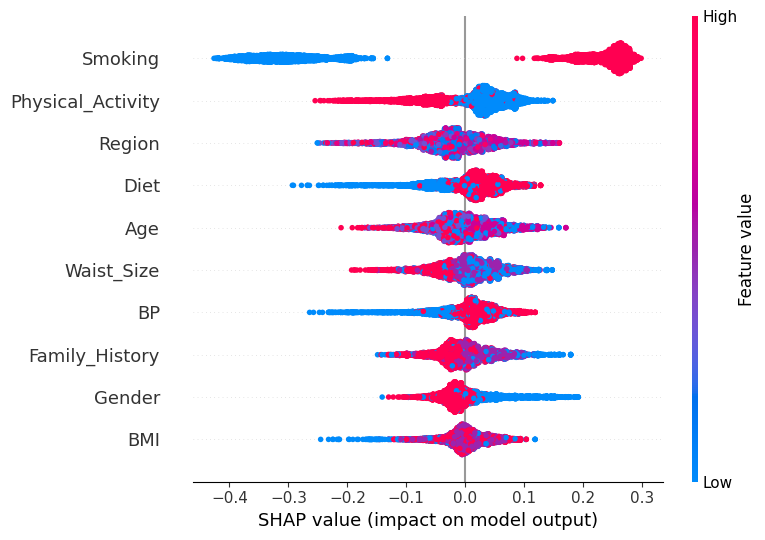

In [6]:
# Plot SHAP values for the positive class (index 1) against the corresponding subset of the training data
shap.summary_plot(shap_values[:,:,1], X_train.values, feature_names=X.columns) # Use all of X_train, and select the second element along the third axis of shap_values

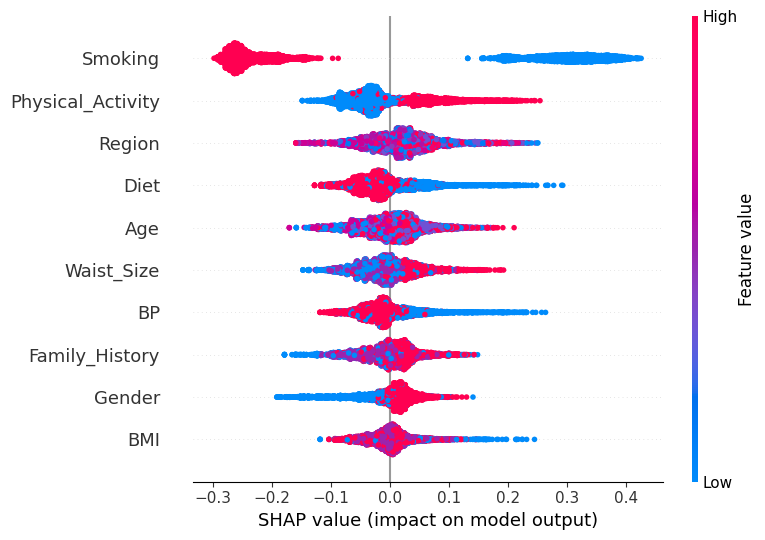

In [7]:
# Plot SHAP values for the positive class (index 1) against the corresponding subset of the training data
shap.summary_plot(shap_values[:,:,0], X_train.values, feature_names=X.columns) # Use all of X_train, and select the second element along the third axis of shap_values

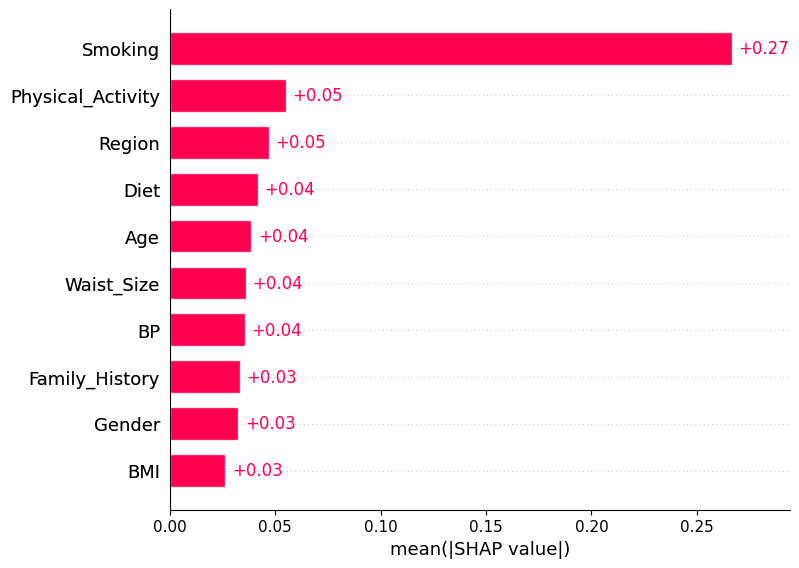

In [8]:
# Select the SHAP values for the positive class
shap_values_positive = shap_values[:,:,1]

# Create a SHAP Explanation object for the positive class
explanation_positive = shap.Explanation(shap_values_positive,
                                        feature_names=X_train.columns,
                                        data=X_train.values)

# Plot the SHAP values for the positive class
shap.plots.bar(explanation_positive)

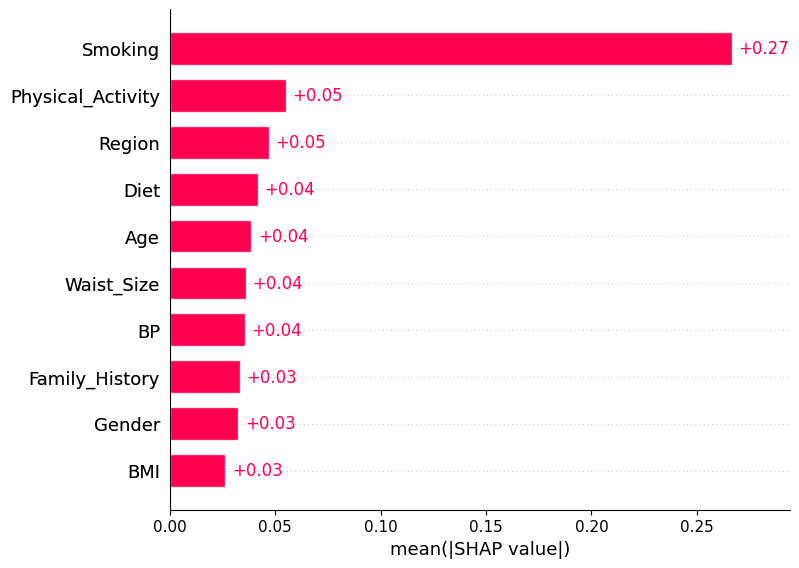

In [9]:
# prompt: select shap value for negative class and bar plot

# Select the SHAP values for the negative class
shap_values_negative = shap_values[:,:,0]

# Create a SHAP Explanation object for the negative class
explanation_negative = shap.Explanation(shap_values_negative,
                                        feature_names=X_train.columns,
                                        data=X_train.values)

# Plot the SHAP values for the negative class
shap.plots.bar(explanation_negative)


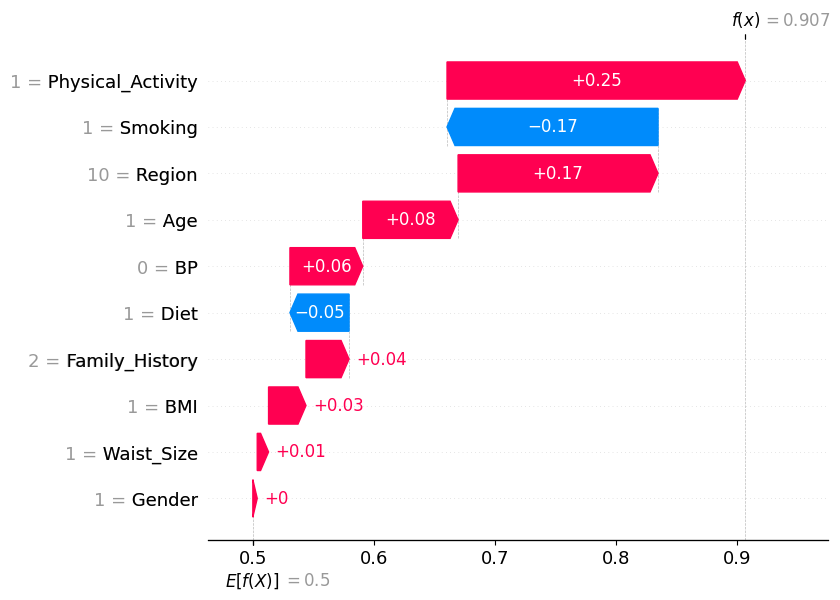

In [39]:

# Select a sample from the negative class (assuming you know the index of a negative sample)
negative_sample_index = 4674  # Replace with the actual index of a negative sample

# Select the first sample's SHAP values for the first class (index 0)
sample_shap_values_negative = shap_values[negative_sample_index, :, 0]

# Assuming 'expected_value' is the base value you obtained during SHAP calculation
# Replace with the actual variable name or value if it's different
expected_value = 0.5  # Example value, replace with your actual base value

# Create a SHAP Explanation object for the first sample and first class,
# explicitly providing the base value
explanation = shap.Explanation(sample_shap_values_negative,
                               feature_names=X_train.columns,
                               data=X_train.values[negative_sample_index],
                               base_values=expected_value)

# Plot the waterfall plot for the first sample and first class
shap.plots.waterfall(explanation)

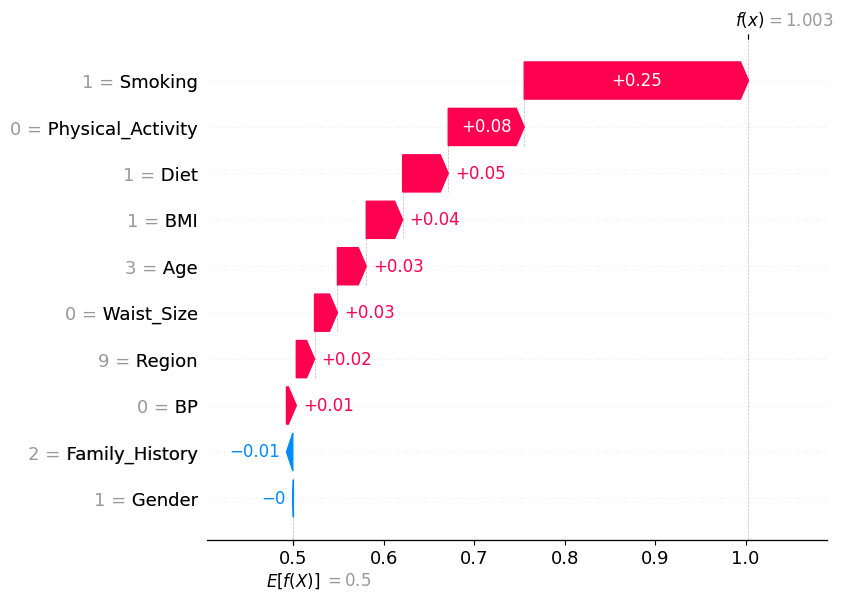

In [32]:
# prompt: now plot waterfall for positive class data point

# Select a sample from the positive class (assuming you know the index of a positive sample)
positive_sample_index = 6134  # Replace with the actual index of a positive sample

# Select the positive sample's SHAP values for the positive class (index 1)
sample_shap_values_positive = shap_values[positive_sample_index, :, 1]

# Create a SHAP Explanation object for the positive sample and positive class
explanation_positive_sample = shap.Explanation(sample_shap_values_positive,
                                               feature_names=X_train.columns,
                                               data=X_train.values[positive_sample_index],
                                               base_values=expected_value)  # Use the same base value as before

# Plot the waterfall plot for the positive sample and positive class
shap.plots.waterfall(explanation_positive_sample)


In [28]:
y_train

4674    0
5822    1
6134    1
4280    0
4988    1
       ..
5226    1
5390    1
860     0
7603    1
7270    1
Name: Class, Length: 6244, dtype: int64